# Ford GoBike System Data


## Introduction

Ford GoBike is the Bay Area's bike share system. In 2017, Ford GoBike will reinvent bike share in the Bay Area with 7,000 bikes across San Francisco, the East Bay and San Jose. Ford GoBike is expected to become an essential part of the Bay Area's transportation network.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime


%matplotlib inline

In [2]:
# load in the dataset 
df=pd.read_csv('202007-baywheels-tripdata.csv')

In [3]:
#show the dataset 
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,68213B7BB2420043,electric_bike,2020-07-31 17:36:17,2020-07-31 17:48:13,NaN,NaN,McAllister St at Baker St,52.0,37.790000,-122.460000,37.777414,-122.441949,casual
1,A64F0CD3A8E59529,electric_bike,2020-07-31 19:42:50,2020-07-31 19:49:54,Buchanan St at North Point St,400.0,Buchanan St at North Point St,400.0,37.804388,-122.433510,37.804408,-122.433509,casual
2,B3690CA0F5179242,electric_bike,2020-07-31 17:18:46,2020-07-31 17:36:31,NaN,NaN,Hyde St at Post St,369.0,37.760000,-122.410000,37.787422,-122.416777,casual
3,162FFE2E157F4C8F,electric_bike,2020-07-31 20:48:47,2020-07-31 21:05:04,Jersey St at Castro St,137.0,NaN,NaN,37.750576,-122.433743,37.770000,-122.420000,casual
4,C5DA8100F428B934,electric_bike,2020-07-31 20:18:24,2020-07-31 20:24:26,Market St at Steuart St,16.0,NaN,NaN,37.794582,-122.394791,37.790000,-122.400000,casual


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154967 entries, 0 to 154966
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             154967 non-null  object 
 1   rideable_type       154967 non-null  object 
 2   started_at          154967 non-null  object 
 3   ended_at            154967 non-null  object 
 4   start_station_name  102589 non-null  object 
 5   start_station_id    102589 non-null  float64
 6   end_station_name    100407 non-null  object 
 7   end_station_id      100407 non-null  float64
 8   start_lat           154967 non-null  float64
 9   start_lng           154967 non-null  float64
 10  end_lat             154771 non-null  float64
 11  end_lng             154771 non-null  float64
 12  member_casual       154967 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.4+ MB


In [5]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,102589.00000,100407.000000,154967.000000,154967.000000,154771.000000,154771.000000
mean,224.38394,220.963837,37.732393,-122.357516,37.732502,-122.353342
std,172.17782,172.435490,0.138354,0.167669,0.138407,0.599176
min,3.00000,3.000000,37.240000,-122.510000,37.230000,-122.510000
25%,72.00000,72.000000,37.760000,-122.433274,37.760000,-122.432532
50%,153.00000,145.000000,37.773981,-122.413233,37.773953,-122.412408
75%,385.00000,384.000000,37.788299,-122.391967,37.788472,-122.391984
max,534.00000,534.000000,37.880222,-121.770000,37.880222,-42.344893


In [6]:
#Check if the values are missing 
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    52378
start_station_id      52378
end_station_name      54560
end_station_id        54560
start_lat                 0
start_lng                 0
end_lat                 196
end_lng                 196
member_casual             0
dtype: int64

In [7]:
df_clean = df
#Delete unused columns
df_clean=df_clean.drop(['started_at', 'ended_at','start_lat','end_lat','end_lng','start_lng','started_at','ended_at'], axis=1)
#Remove the null
df_clean.dropna(subset = ["start_station_name","end_station_name","start_station_id","end_station_id"], inplace=True)


In [8]:
df_clean.isnull().sum()

ride_id               0
rideable_type         0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
dtype: int64

In [9]:
#change data type to integer
df_clean['start_station_id']=df_clean['start_station_id'].astype(int)
df_clean['end_station_id']=df_clean['end_station_id'].astype(int)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83530 entries, 1 to 154966
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ride_id             83530 non-null  object
 1   rideable_type       83530 non-null  object
 2   start_station_name  83530 non-null  object
 3   start_station_id    83530 non-null  int32 
 4   end_station_name    83530 non-null  object
 5   end_station_id      83530 non-null  int32 
 6   member_casual       83530 non-null  object
dtypes: int32(2), object(5)
memory usage: 4.5+ MB


In [11]:
#Separate date and time from each other
def SeparateDateTime(x,y):
    df_clean[y+'date']=pd.to_datetime(x,format='%Y-%m-%d %H:%M:%S').dt.date
    df_clean[y+'time']= pd.to_datetime(x,format='%Y-%m-%d %H:%M:%S').dt.time
    return df_clean

SeparateDateTime(df['started_at'],'start_')
SeparateDateTime(df['ended_at'],'end_')

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_date,start_time,end_date,end_time
1,A64F0CD3A8E59529,electric_bike,Buchanan St at North Point St,400,Buchanan St at North Point St,400,casual,2020-07-31,19:42:50,2020-07-31,19:49:54
12,69870487B4A7E755,electric_bike,Mission Bay Kids Park,92,The Embarcadero at Bryant St,28,casual,2020-07-22,18:57:38,2020-07-22,19:09:26
13,D33B8F211BE3957D,electric_bike,Church St at Duboce Ave,85,Church St at Duboce Ave,85,casual,2020-07-23,16:44:02,2020-07-23,16:44:31
17,1D66FB2B5768E4F7,electric_bike,22nd St at Dolores St,131,Laguna St at Hayes St,74,casual,2020-07-22,17:12:32,2020-07-22,17:24:56
18,A27702B61828E941,electric_bike,Laguna St at Hayes St,74,22nd St at Dolores St,131,casual,2020-07-22,20:45:16,2020-07-22,20:59:15
...,...,...,...,...,...,...,...,...,...,...,...
154962,E084E6C3FA402D75,docked_bike,Embarcadero BART Station (Beale St at Market St),17,Washington St at Kearny St,10,casual,2020-07-12,17:32:32,2020-07-12,17:44:56
154963,007588EAADE2C43D,docked_bike,Washington St at Kearny St,10,Green St at Van Ness Ave,496,casual,2020-07-12,18:20:15,2020-07-12,19:03:19
154964,7B538D4F6299E5F9,docked_bike,Green St at Van Ness Ave,496,Washington St at Kearny St,10,casual,2020-07-12,19:04:52,2020-07-12,19:57:50
154965,06B455C0C83B9C16,docked_bike,Market St at Steuart St,16,Embarcadero BART Station (Beale St at Market St),17,casual,2020-07-12,16:13:57,2020-07-12,17:29:43


Calculate the duration 

In [12]:
#Calculate the duration
df_clean['duration']=pd.to_datetime(df_clean['end_time'].astype(str)) - pd.to_datetime(df_clean['start_time'].astype(str))

#Calculate the duration in minutes
df_clean['Duration_minutes']=df_clean['duration'].dt.total_seconds().div(60).astype(int)

#Calculate 23 between 24 or 0 hour
for x in df_clean.index :
    if(df_clean['Duration_minutes'][x]<-0) :
        df_clean['Duration_minutes'][x]=df_clean['Duration_minutes'][x]--1440        
#Calculate the duration in seconds
df_clean['Duration_seconds']=df_clean['Duration_minutes']*60

C:\Users\FOFO\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Calculate days 

In [13]:
#change data type to integer
df_clean['start_date'] = pd.to_datetime(df_clean['start_date'])
df_clean['end_date'] = pd.to_datetime(df_clean['end_date'])

#Calculate days 
df_clean['start_day'] = df_clean.start_date.dt.day
df_clean['end_day'] = df_clean.end_date.dt.day

#Calculate day of week
df_clean['day_of_week'] = df_clean['start_date'].dt.day_name()




In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83530 entries, 1 to 154966
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   ride_id             83530 non-null  object         
 1   rideable_type       83530 non-null  object         
 2   start_station_name  83530 non-null  object         
 3   start_station_id    83530 non-null  int32          
 4   end_station_name    83530 non-null  object         
 5   end_station_id      83530 non-null  int32          
 6   member_casual       83530 non-null  object         
 7   start_date          83530 non-null  datetime64[ns] 
 8   start_time          83530 non-null  object         
 9   end_date            83530 non-null  datetime64[ns] 
 10  end_time            83530 non-null  object         
 11  duration            83530 non-null  timedelta64[ns]
 12  Duration_minutes    83530 non-null  int32          
 13  Duration_seconds    83530 non-

In [15]:
#show dataset
df_clean

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_date,start_time,end_date,end_time,duration,Duration_minutes,Duration_seconds,start_day,end_day,day_of_week
1,A64F0CD3A8E59529,electric_bike,Buchanan St at North Point St,400,Buchanan St at North Point St,400,casual,2020-07-31,19:42:50,2020-07-31,19:49:54,00:07:04,7,420,31,31,Friday
12,69870487B4A7E755,electric_bike,Mission Bay Kids Park,92,The Embarcadero at Bryant St,28,casual,2020-07-22,18:57:38,2020-07-22,19:09:26,00:11:48,11,660,22,22,Wednesday
13,D33B8F211BE3957D,electric_bike,Church St at Duboce Ave,85,Church St at Duboce Ave,85,casual,2020-07-23,16:44:02,2020-07-23,16:44:31,00:00:29,0,0,23,23,Thursday
17,1D66FB2B5768E4F7,electric_bike,22nd St at Dolores St,131,Laguna St at Hayes St,74,casual,2020-07-22,17:12:32,2020-07-22,17:24:56,00:12:24,12,720,22,22,Wednesday
18,A27702B61828E941,electric_bike,Laguna St at Hayes St,74,22nd St at Dolores St,131,casual,2020-07-22,20:45:16,2020-07-22,20:59:15,00:13:59,13,780,22,22,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154962,E084E6C3FA402D75,docked_bike,Embarcadero BART Station (Beale St at Market St),17,Washington St at Kearny St,10,casual,2020-07-12,17:32:32,2020-07-12,17:44:56,00:12:24,12,720,12,12,Sunday
154963,007588EAADE2C43D,docked_bike,Washington St at Kearny St,10,Green St at Van Ness Ave,496,casual,2020-07-12,18:20:15,2020-07-12,19:03:19,00:43:04,43,2580,12,12,Sunday
154964,7B538D4F6299E5F9,docked_bike,Green St at Van Ness Ave,496,Washington St at Kearny St,10,casual,2020-07-12,19:04:52,2020-07-12,19:57:50,00:52:58,52,3120,12,12,Sunday
154965,06B455C0C83B9C16,docked_bike,Market St at Steuart St,16,Embarcadero BART Station (Beale St at Market St),17,casual,2020-07-12,16:13:57,2020-07-12,17:29:43,01:15:46,75,4500,12,12,Sunday


## What is the structure of your dataset?


There are 83530 trip in the dataset with 11 features ,Most variables are string in nature, but the numeric variables are start_station_id,end_station_id  .

ride_id: Trip ID

rideable_type: the Bike type (docked bike,electric bike )

start_station_name :Name Start Station 

start_station_id: Start Station ID

end_station_name :Name End Station 
 
end_station_id :End Station ID

member_casual: User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
 
start_date and start_time :Start Time and Date

end_date and end_time :EndTime and Date

## What is/are the main feature(s) of interest in your dataset?



I am interested in knowing the factors that affect the trip duration

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?


start_date and start_time/end_date and end_time

rideable_type

member_casual


# Univariate Exploration


### Who are the most user taking trips ?



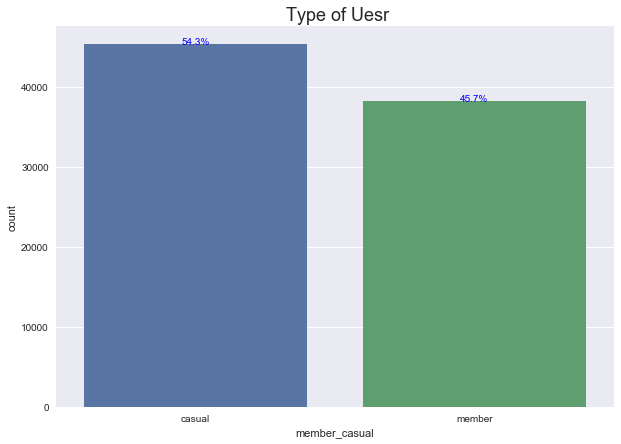

In [16]:
#size plot
plt.figure(figsize = (10, 7))
plt.style.use('seaborn')

sb.countplot(data = df_clean, x = 'member_casual')

# add numbers of total member_casual
n_points = df_clean.shape[0]
cat_counts = df_clean['member_casual'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'b')
    
plt.title(' Type of Uesr', fontsize = 18);
plt.show();

#### The casual user more than member user makes the trip.
It reaches a rate of 54.3 percent casual users is more than the  rate of 45.7 percent member users making the trip.


### What is the most common type of bike used?

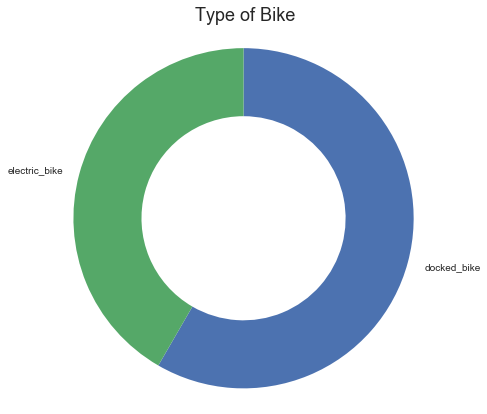

In [17]:
plt.figure(figsize = (10, 7))
plt.style.use('seaborn')
sorted_counts = df_clean['rideable_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');
plt.title(' Type of Bike', fontsize = 18);
plt.show();

#### The most common type of bicycle  is docked bike

### How long do people spend the trip ?

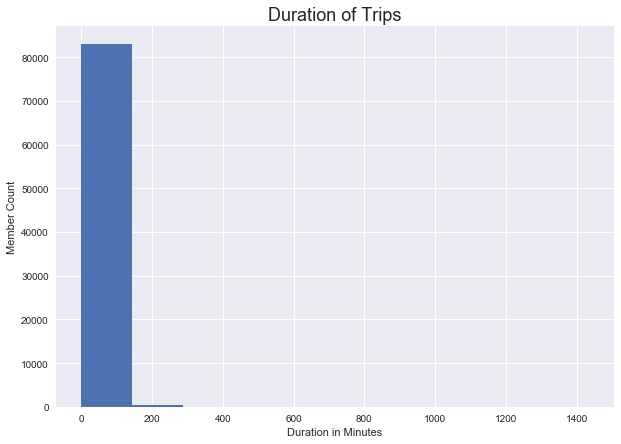

In [18]:
plt.figure(figsize = (10, 7))
plt.style.use('seaborn')
plt.hist(data =df_clean, x = 'Duration_minutes');
plt.title('Duration of Trips', fontsize = 18);
plt.xlabel('Duration in Minutes');
plt.ylabel('Member Count');
plt.show();

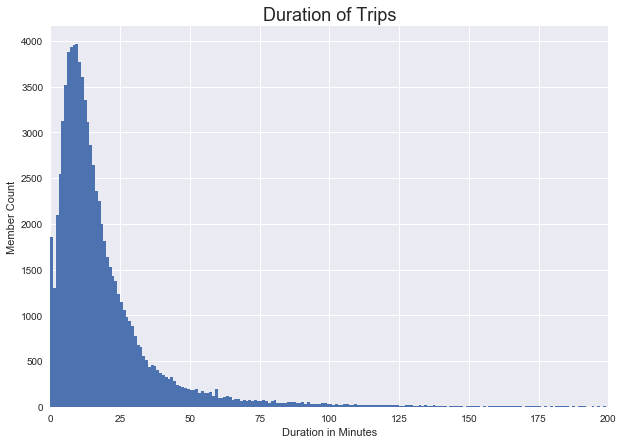

In [19]:
plt.figure(figsize = (10, 7))
plt.style.use('seaborn')
bins = np.arange(0, df_clean['Duration_minutes'].max()+1, 1)
plt.hist(data = df_clean, x = 'Duration_minutes', bins = bins);
plt.xlim([0,200])
plt.title('Duration of Trips',fontsize = 18);
plt.xlabel('Duration in Minutes');
plt.ylabel('Member Count');
plt.show();

Given the distribution of the distribution of How long do people spend the trip in minutes ,we see some outliers at the end to extremely skewed the data , I set a top limit of 200 minutes. It's still right-skewed we can see that the peak usage falls in that 2.5 - 20 minutes range, so people are using these bikes for quick rides.

## Bivariate Exploration

### What day of the week people like to trip by bike?

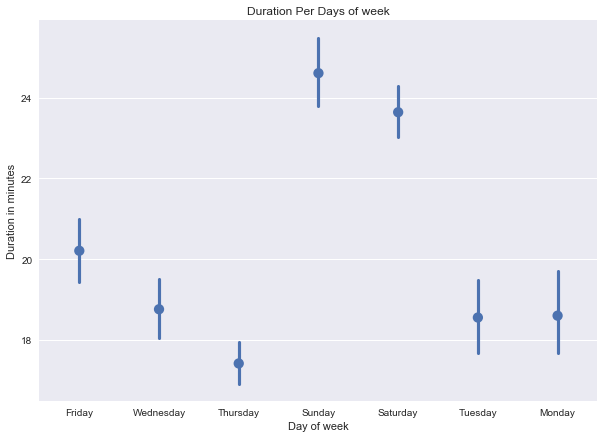

In [20]:

plt.figure(figsize = (10, 7))
plt.style.use('seaborn')
sb.pointplot(data = df_clean, x = 'day_of_week', y = 'Duration_minutes', linestyles = "")
plt.ylabel('Duration in minutes');
plt.xlabel('Day of week');
plt.title('Duration Per Days of week');
plt.show()

As we can observe,sunday has the most trips duration and close to it on saturday and the least day of the week is Thursday .

In [21]:
d=df_clean.day_of_week.value_counts()
d
d=df_clean.day_of_week.value_counts()


 ### Which bike is used the most for each type of user ?

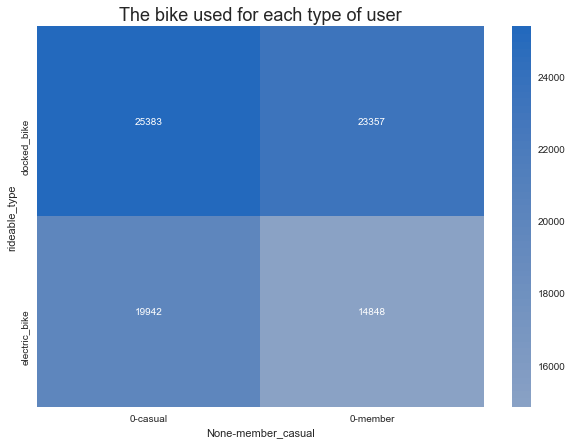

In [22]:
counts_data = df_clean.groupby(['rideable_type', 'member_casual']).size()
counts_data = counts_data.reset_index()
counts_data = counts_data.pivot(index = 'rideable_type', columns = 'member_casual')

plt.figure(figsize = (10, 7))
sb.heatmap(counts_data, annot = True, fmt = 'd',cmap = 'vlag_r',center = 1);
plt.title('The bike used for each type of user', fontsize = 18);
plt.show()

We notice that the subscribing members use the docked bike more then electric bike, as well as the non-subscribers

## Multivariate Exploration


### What is the most consumed bike on trips during a month?

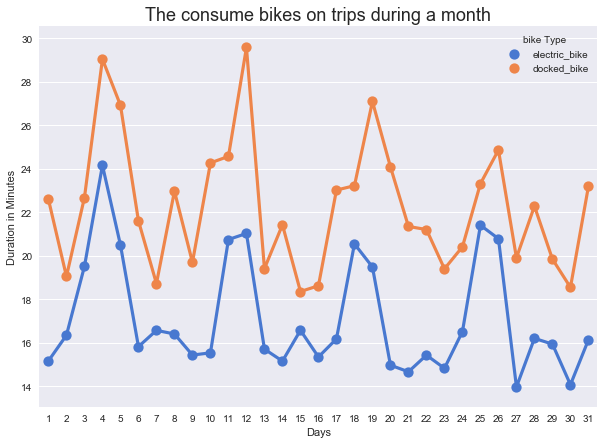

In [23]:
plt.figure(figsize = (10, 7))
plt.style.use('seaborn')

sb.pointplot(data = df_clean.sort_values(by='start_day'), x = 'start_day', y = 'Duration_minutes',
             hue = 'rideable_type', palette = 'muted', ci = None);
plt.title('The consume bikes on trips during a month', fontsize = 18);
plt.legend(title = 'bike Type ');
plt.xlabel('Days');
plt.ylabel('Duration in Minutes');




Note that the electronic bike is the most consumed than the docked bike But they have the same growth in the increase or decrease in consumption during the days of the month

### Which bike do users prefer for a trip, and which days of the week do they prefer to use it?

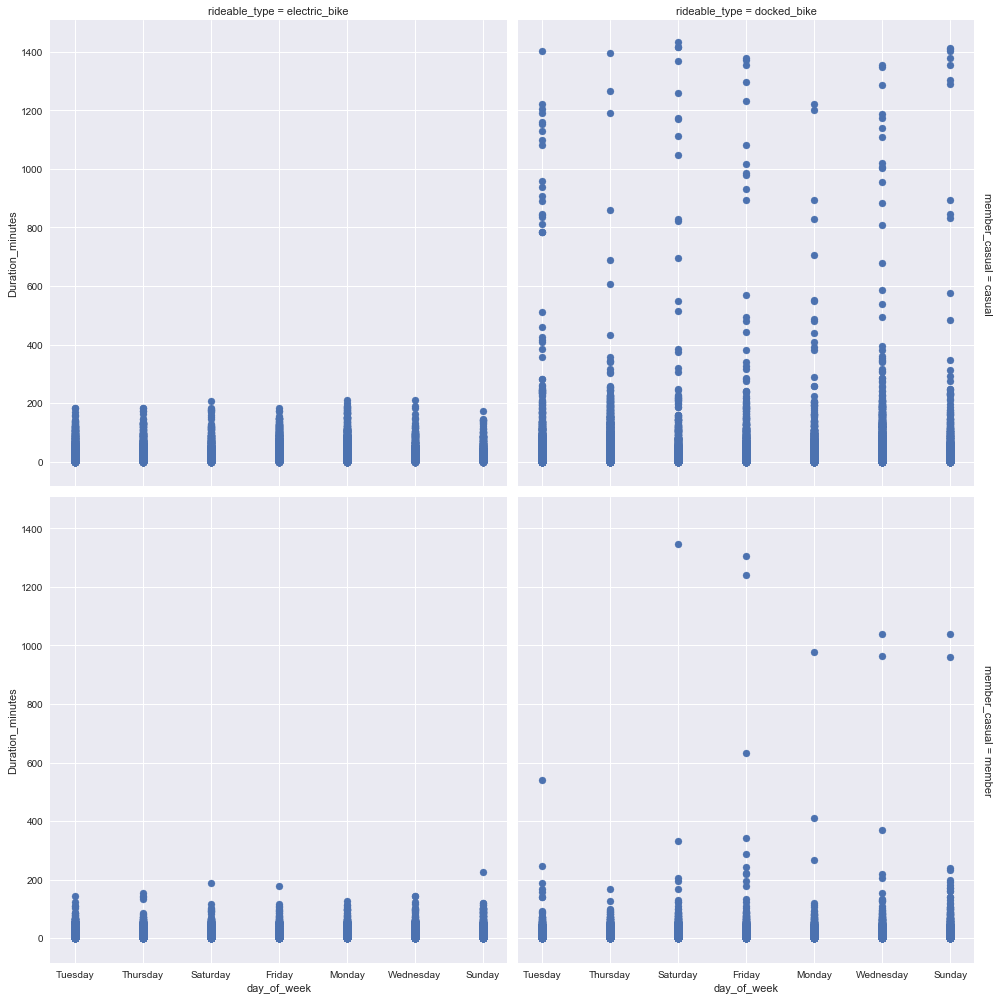

In [26]:


plt.style.use('seaborn')

g = sb.FacetGrid(data = df_clean, col = 'rideable_type', row = 'member_casual', height = 7,
                margin_titles = True);
g.map(plt.scatter, 'day_of_week','Duration_minutes');
plt.show();



We note that the electric bike is the least used and similarly consumed on all days of the week by all users and The docked bike is the most used by all users. But member users consume less than non-subscribers. member users use it more on Friday than on the rest of the week, and non-subscribers use it almost the same on all days of the week.

In [25]:
df_clean.to_csv('ford-gobike-master.csv', index=False, encoding = 'utf-8')